<a href="https://colab.research.google.com/github/DianaDoosti-PouyanBahmani/Intelligent-Systems/blob/main/mini%20project%201/MP1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

url = 'https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6'
df = pd.read_csv(url)

print(" اطلاعات کلی داده‌ها:")
print(df.info())

print(" خلاصه آماری داده‌ها:")
print(df.describe())

print(" بررسی مقادیر گمشده (NaN):")
print(df.isnull().sum())


 اطلاعات کلی داده‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
None
 خلاصه آماری داده‌ها:
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816   

In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("🔢 ویژگی‌های عددی:", list(numeric_features))
print("🔠 ویژگی‌های طبقه‌ای:", list(categorical_features))

🔢 ویژگی‌های عددی: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
🔠 ویژگی‌های طبقه‌ای: []


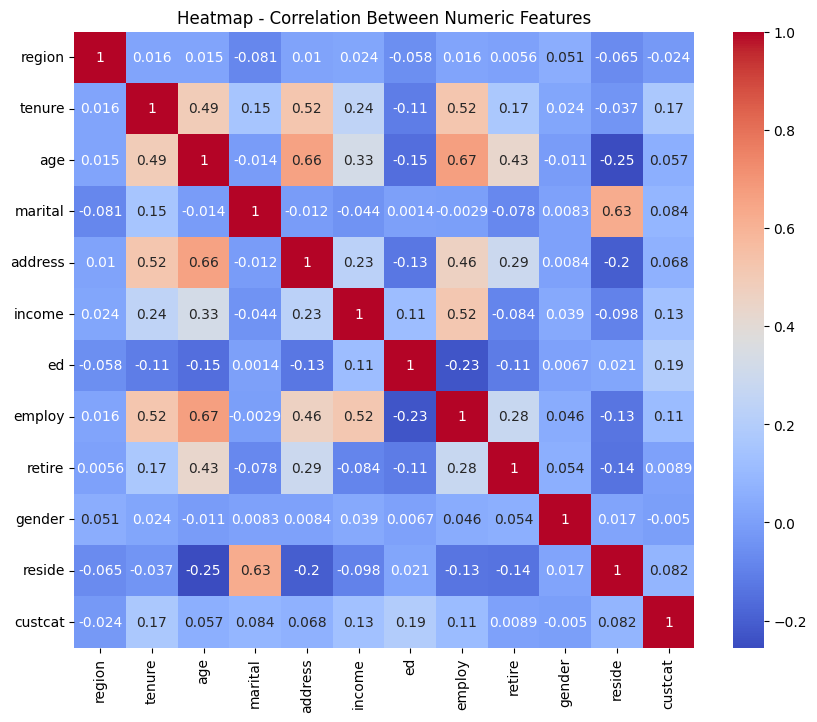

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap - Correlation Between Numeric Features')
plt.show()


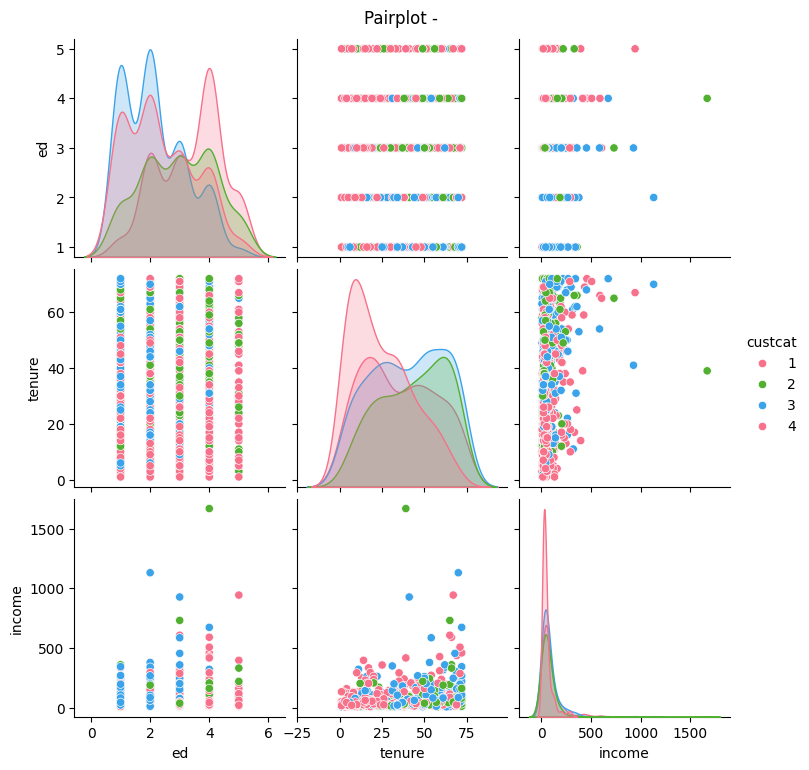

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# انتخاب چند ویژگی مهم + متغیر هدف
important_features = ['ed', 'tenure', 'income', 'custcat']

# رسم Pairplot برای این ویژگی‌ها
sns.pairplot(df[important_features], hue='custcat', diag_kind='kde', palette='husl')
plt.suptitle("Pairplot -", y=1.02)
plt.show()

In [ ]:

# ستون‌های طبقه‌ای
categorical_cols = ['region', 'marital', 'gender', 'retire', 'reside', 'ed']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

   tenure  age  address  income  employ  custcat  region_2  region_3  \
0      13   44        9    64.0       5        1      True     False   
1      11   33        7   136.0       5        4     False      True   
2      68   52       24   116.0      29        3     False      True   
3      33   33       12    33.0       0        1      True     False   
4      23   30        9    30.0       2        3      True     False   

   marital_1  gender_1  ...  reside_3  reside_4  reside_5  reside_6  reside_7  \
0       True     False  ...     False     False     False     False     False   
1       True     False  ...     False     False     False      True     False   
2       True      True  ...     False     False     False     False     False   
3      False      True  ...     False     False     False     False     False   
4       True     False  ...     False      True     False     False     False   

   reside_8   ed_2   ed_3   ed_4   ed_5  
0     False  False  False   True  Fals

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

url = 'https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6'
df = pd.read_csv(url)

# ستون‌های عددی
numeric_cols = ['tenure', 'age', 'address', 'income', 'employ']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

   region    tenure       age  marital   address    income  ed    employ  \
0       2 -1.055125  0.184505        1 -0.253034 -0.126506   4 -0.594123   
1       3 -1.148806 -0.691812        1 -0.451415  0.546450   5 -0.594123   
2       3  1.521092  0.821826        1  1.234819  0.359517   1  1.787528   
3       2 -0.118319 -0.691812        0  0.044536 -0.416251   2 -1.090300   
4       2 -0.586722 -0.930808        1 -0.253034 -0.444291   1 -0.891829   

   retire  gender  reside  custcat  
0     0.0       0       2        1  
1     0.0       0       6        4  
2     0.0       1       2        3  
3     0.0       1       1        1  
4     0.0       0       4        3  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())

   region    tenure       age  marital   address    income  ed    employ  \
0       2  0.169014  0.440678        1  0.163636  0.033153   4  0.106383   
1       3  0.140845  0.254237        1  0.127273  0.076552   5  0.106383   
2       3  0.943662  0.576271        1  0.436364  0.064497   1  0.617021   
3       2  0.450704  0.254237        0  0.218182  0.014467   2  0.000000   
4       2  0.309859  0.203390        1  0.163636  0.012658   1  0.042553   

   retire  gender  reside  custcat  
0     0.0       0       2        1  
1     0.0       0       6        4  
2     0.0       1       2        3  
3     0.0       1       1        1  
4     0.0       0       4        3  


In [ ]:
import pandas as pd

cols_to_drop = ['region', 'gender', 'retire']
df = df.drop(columns=cols_to_drop)

print("Shape after dropping columns:", df.shape)
print(df.head())

Shape after dropping columns: (1000, 9)
     tenure       age  marital   address    income  ed    employ  reside  \
0  0.169014  0.440678        1  0.163636  0.033153   4  0.106383       2   
1  0.140845  0.254237        1  0.127273  0.076552   5  0.106383       6   
2  0.943662  0.576271        1  0.436364  0.064497   1  0.617021       2   
3  0.450704  0.254237        0  0.218182  0.014467   2  0.000000       1   
4  0.309859  0.203390        1  0.163636  0.012658   1  0.042553       4   

   custcat  
0        1  
1        4  
2        3  
3        1  
4        3  


In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# --- 1) خواندن داده ---
url = 'https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6'
df = pd.read_csv(url)

# --- 2) حذف ویژگی‌های کم‌اهمیت ---
cols_to_drop = ['region', 'gender', 'retire']
df = df.drop(columns=cols_to_drop)

# --- 3) جدا کردن ویژگی‌ها و هدف ---
X = df.drop(columns=['custcat'])
y = df['custcat']

# --- 4) استانداردسازی داده ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# ✅ روش انتخاب ویژگی: Lasso Regression
# ------------------------------
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# ویژگی‌هایی که ضریب آنها صفر نشده است → مهم هستند
selected_features = X.columns[lasso.coef_ != 0]

print(" ویژگی‌های انتخاب‌شده توسط Lasso:")
print(list(selected_features))

# نمایش ضرایب برای فهم بهتر
print("\nضرایب لاسو:")
for feat, coef in zip(X.columns, lasso.coef_):
    print(f"{feat}: {coef:.4f}")

 ویژگی‌های انتخاب‌شده توسط Lasso:
['tenure', 'age', 'marital', 'income', 'ed', 'employ', 'reside']

ضرایب لاسو:
tenure: 0.1581
age: -0.0144
marital: 0.0033
address: 0.0000
income: 0.0471
ed: 0.2337
employ: 0.0822
reside: 0.0926


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# --- 1) خواندن داده ---
url = 'https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6'
df = pd.read_csv(url)

# --- 2) حذف ویژگی‌های کم‌اهمیت ---
cols_to_drop = ['region', 'gender', 'retire']
df = df.drop(columns=cols_to_drop)

# --- 3) جدا کردن ویژگی‌ها و هدف ---
X = df.drop(columns=['custcat'])
y = df['custcat']

# --- 4) استانداردسازی ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# ✅ روش دوم: RFE (حذف بازگشتی ویژگی‌ها)
# ------------------------------

# مدل پایه
model = LogisticRegression(max_iter=200)

# تعداد ویژگی‌های مهم نهایی (مثلاً 5 تا)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_scaled, y)

selected_rfe = X.columns[rfe.support_]

print(" ویژگی‌های انتخاب‌شده توسط RFE:")
print(list(selected_rfe))

print("\nرتبه‌بندی ویژگی‌ها (عدد کوچکتر = مهم‌تر):")
print(rfe.ranking_)

 ویژگی‌های انتخاب‌شده توسط RFE:
['tenure', 'income', 'ed', 'employ', 'reside']

رتبه‌بندی ویژگی‌ها (عدد کوچکتر = مهم‌تر):
[1 2 3 4 1 1 1 1]


 دقت روی داده آموزش: 0.42
دقت روی داده آزمون: 0.39


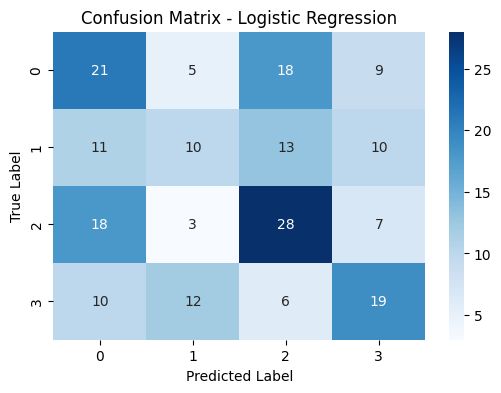

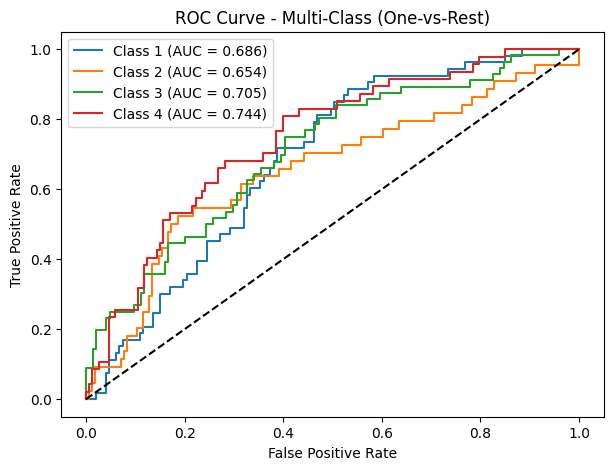

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) آماده‌سازی داده‌ها ---
# فرض می‌کنیم df دیتاست نهایی بعد از حذف ویژگی‌های غیرضروری باشد

selected_features_rfe = ['tenure', 'income', 'ed', 'employ', 'reside']

X = df[selected_features_rfe]
y = df['custcat']

# --- 2) نرمال‌سازی ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3) تقسیم داده‌ها ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4) مدل ---
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --- 5) پیش‌بینی ---
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# --- 6) دقت ---
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(" دقت روی داده آموزش:", train_acc)
print("دقت روی داده آزمون:", test_acc)

# --- 7) Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- 8) ROC Curve & AUC ---
# تبدیل y به مقدار دودویی برای AUC (برای چندکلاسی از روش OvR استفاده می‌کنیم)
y_prob = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(1, 5):  # کلاس‌های ۱ تا ۴
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7,5))
for i in range(1,5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-Class (One-vs-Rest)")
plt.legend()
plt.show()

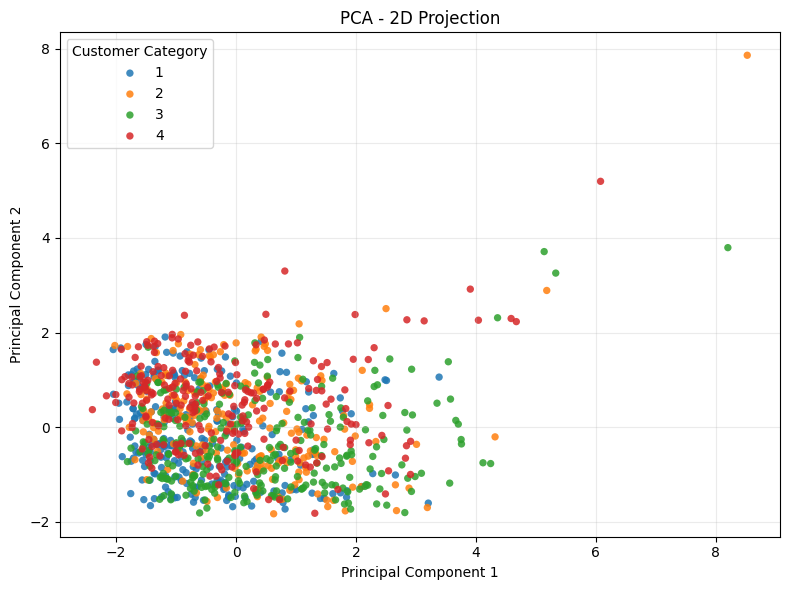

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Load & prune (همان حذف‌های قبلی)
url = 'https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6'
df = pd.read_csv(url)
df = df.drop(columns=['region', 'gender', 'retire'])

# 2) Select features (ست ویژگی نهایی)
features = ['tenure', 'income', 'ed', 'employ', 'reside']
X = df[features].astype(float)
y = df['custcat'].astype(int)   # کلاس‌ها: 1..4

# 3) Standardize + PCA(2)
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(Xz)

# 4) Scatter با رنگ‌های گسسته و Legend (نه colorbar)
palette = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c', 4: '#d62728'}  # آبی/نارنجی/سبز/قرمز
plt.figure(figsize=(8,6))

for cls in sorted(palette.keys()):
    mask = (y == cls)
    plt.scatter(Xp[mask, 0], Xp[mask, 1],
                s=28, alpha=0.85, color=palette[cls], label=str(cls), edgecolors='none')

plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(alpha=0.25)
plt.legend(title='Customer Category', frameon=True)
plt.tight_layout()
plt.show()


In [ ]:
# LDA با ۲ مؤلفه
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# رسم scatter plot
plt.figure(figsize=(7,5))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.title('LDA - 2D Scatter Plot')
plt.colorbar(label='Customer Class')
plt.show()

NameError: name 'LDA' is not defined

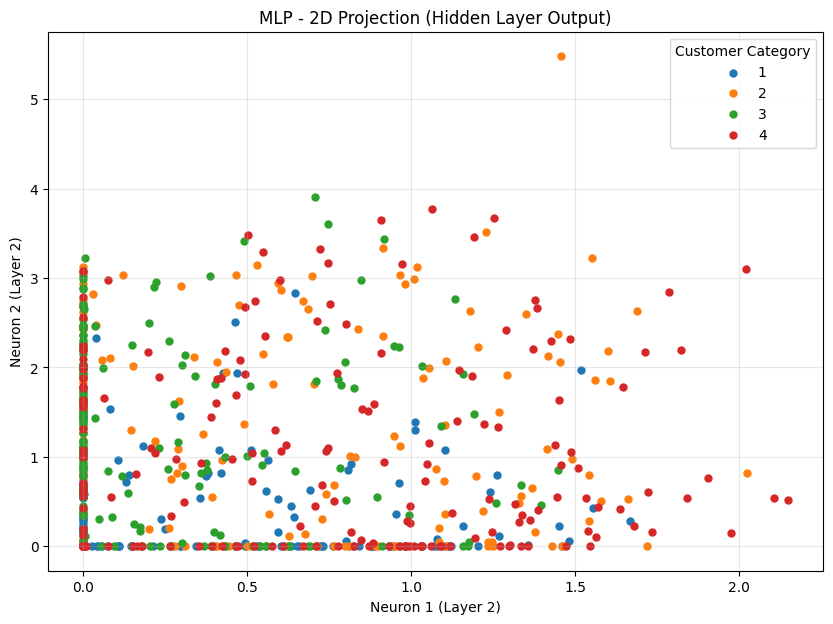

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -------- 1) Scale the data --------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------- 2) Train MLP model --------
# Architecture: 5 → 5 → 2 → output
mlp = MLPClassifier(hidden_layer_sizes=(5, 2),
                    activation='relu',
                    max_iter=500,
                    random_state=42)

mlp.fit(X_train_scaled, y_train)

# -------- 3) Extract the 2D hidden layer output --------
# The pre-activation output of hidden layers can be obtained from .predict()
layer2_output = mlp.predict(X_train_scaled)

# BUT we need actual hidden layer (layer 2) activations:
def get_layer2_output(model, X):
    # Access weight matrices
    W1, W2, W3 = model.coefs_
    b1, b2, b3 = model.intercepts_

    # Layer 1 activation
    Z1 = X @ W1 + b1
    A1 = np.maximum(0, Z1)  # ReLU

    # Layer 2 activation (THIS is the 2D output we want)
    Z2 = A1 @ W2 + b2
    A2 = np.maximum(0, Z2)  # ReLU

    return A2  # Shape = (n_samples, 2)

X_2D = get_layer2_output(mlp, X_train_scaled)

# -------- 4) Plot 2D projection --------
plt.figure(figsize=(10, 7))

for cls in np.unique(y_train):
    idx = (y_train == cls)
    plt.scatter(X_2D[idx, 0], X_2D[idx, 1],
                label=str(cls), s=25)

plt.title("MLP - 2D Projection (Hidden Layer Output)")
plt.xlabel("Neuron 1 (Layer 2)")
plt.ylabel("Neuron 2 (Layer 2)")
plt.legend(title="Customer Category")
plt.grid(alpha=0.3)
plt.show()